# **Section 1 Project) 다음 분기에 어떤 게임을 개발해야 할까?**

## **1. EDA & Feature Engeering**

#### **출고량**
- 출고량 단위 설정
	- K 1000, M 1000000, 0.03M = 30000 = 0.03, 60K = 60000 = 0.06
	- 출고량 범위 살피고 범위에 따라 K인지 M인지 도출
- 총출고량 `Sales_Sum` 칼럼 생성

#### **플랫폼**
- 2600 = 아타리 2600

#### **연도**
- float > int화
- 이상치 9, 97, 11 등(min max) <1900 이하 값 도출하여 값 재설정
- 2022 이상 값 있는지 확인

#### **장르**
- misc =기타

In [1]:
#데이터셋 EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

#scipy

In [2]:
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [4]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [5]:
df = pd.read_csv('vgames2.csv', index_col=0)
df.head()
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [ ]:
df.sample(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14389,Botanicula,PC,2012.0,Adventure,Daedalic Entertainment,0,0.02,0,0
16133,Sakura-Sou no Pet na Kanojo,PSV,2013.0,Adventure,Kadokawa Games,0,0,0.01,0
8040,TV Show King Party,Wii,2008.0,Puzzle,Ubisoft,0.18,0.41,0,0.08
9932,Medal of Honor: Rising Sun,GC,2003.0,Shooter,Electronic Arts,0.33,0.09,0,0.01
4843,Super Robot Taisen W,DS,2007.0,Strategy,Banpresto,0,0,0.3,0
4927,Marvel Nemesis: Rise of the Imperfects,DS,2005.0,Fighting,Electronic Arts,0.08,0,0,0.01
956,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,Adventure,Take-Two Interactive,0.06M,0.04,0,0.01
6886,Yoshi Topsy-Turvy,GBA,2004.0,Platform,Nintendo,0.25,0.09,0.3,0.01
12586,LEGO Marvel Super Heroes,PS4,2013.0,Action,Warner Bros. Interactive Entertainment,0.59,0.75,0.01,0.21
9204,Rally Cross 2,PS,1998.0,Racing,989 Studios,0.19,0.13,0,0.02


In [ ]:
df.info() #총16598 / 결측치 year,genre, publisher / 데이터타입 sales float, year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [6]:
round(df.isnull().sum().sum() / df.shape[0], 2) #결측치비율 2%

0.02

In [7]:
#결측치제거 / 삭제 후에도 이전데이터와 규모차이가 크지 않음
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [8]:
#중복치제거
df.duplicated().sum() #1
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum() #0
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16240,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [9]:
#연도 데이터타입
df.Year = df.Year.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [10]:
# 출고량 데이터타입 / M, K포함
# 단위 M으로 변경
# M행 >> M 삭제하고 반환
# K행 >> K삭제하고 값나눔
# df_wrong_m = df[df['NA_Sales'].str.contains('M')|df['EU_Sales'].str.contains('M')|df['JP_Sales'].str.contains('M')|df['Other_Sales'].str.contains('M')]

for i in range(5, 9) :
  df.iloc[:, i] = df.iloc[:, i].str.replace('M', '')

df_kn = df[df['NA_Sales'].str.contains('K')]
df_ke = df[df['EU_Sales'].str.contains('K')]
df_kj = df[df['JP_Sales'].str.contains('K')]
df_ko = df[df['Other_Sales'].str.contains('K')]

for i in range(5, 9) :
  df.iloc[:, i] = df.iloc[:, i].str.replace('K', '')
  
df.iloc[:, 5:] = df.iloc[:, 5:].astype(float)


In [11]:
df.iloc[df_kn.index, 5] = df.iloc[df_kn.index, 5]/1000
df.iloc[df_ke.index, 6] = df.iloc[df_ke.index, 6]/1000
df.iloc[df_kj.index, 7] = df.iloc[df_kj.index, 7]/1000
df.iloc[df_ko.index, 8] = df.iloc[df_ko.index, 8]/1000

In [12]:
df.iloc[15228, :]

Name           The Witcher 3: Wild Hunt
Platform                            PS4
Year                               2015
Genre                      Role-Playing
Publisher            Namco Bandai Games
NA_Sales                           0.96
EU_Sales                            2.0
JP_Sales                           0.21
Other_Sales                        0.56
Name: 15228, dtype: object

In [ ]:
#이상치 / 없음
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [13]:
df[df.NA_Sales == 41.490000]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46


In [14]:
#총 출고량 칼럼생성
df['Sales_Sum'] = df.iloc[:, 5:].sum(axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [15]:
#연도 이상치

yearerror = df.Year[df.Year < 1900]
yearindex = np.array(yearerror.index)
yearindex

vallst = []
for i in yearindex:
  a = yearerror[i]
  if a < 22 :
    a = a + 2000
    vallst.append((i,a))
  else : 
    a = a+ 1900
    vallst.append((i, a))

for i in range(len(vallst)):
  num = vallst[i]
  df.iloc[vallst[i][0], 2] = vallst[i][1]

In [16]:
vallst[0]

(72, 2009)

In [17]:
df.iloc[79, :]

Name           Treasures of the Deep
Platform                          PS
Year                            1997
Genre                         Action
Publisher         Namco Bandai Games
NA_Sales                         0.1
EU_Sales                        0.07
JP_Sales                         0.0
Other_Sales                     0.01
Sales_Sum                       0.18
Name: 79, dtype: object

### **최종확인**
- 중복치, 결측치
- 아웃라이어

In [ ]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Sales_Sum      0
dtype: int64

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234,0.539091
std,5.832087,0.822431,0.508340,0.309272,0.189678,1.563905
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.sample(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
11703,Dramatical Murder Re:code,PSV,2014,Adventure,Nitroplus,0.00,0.00,0.01,0.00,0.01
14503,Angry Birds Star Wars,PSV,2013,Strategy,Activision,0.05,0.04,0.00,0.03,0.12
4248,Ninjatown,DS,2008,Strategy,SouthPeak Games,0.12,0.00,0.00,0.01,0.13
14674,God Eater 2,PSP,2013,Role-Playing,Namco Bandai Games,0.00,0.00,0.24,0.00,0.24
14738,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0.00,0.00,0.02,0.00,0.02
14709,Taiko no Tatsujin: Go! Go! Godaime,PS2,2004,Misc,Namco Bandai Games,0.00,0.00,0.20,0.00,0.20
6498,Nike+ Kinect Training,X360,2012,Sports,Microsoft Game Studios,0.02,0.02,0.00,0.00,0.04
13232,Taito Legends Power Up,PSP,2007,Action,Destineer,0.05,0.00,0.00,0.00,0.05
14942,Jikkyou Powerful Pro Yakyuu 2012,PSV,2012,Action,Konami Digital Entertainment,0.00,0.00,0.09,0.00,0.09
4275,Transformer: Rise of the Dark Spark,PS4,2014,Action,Activision,0.07,0.10,0.01,0.04,0.22


## **2. 가설1) 지역에 따라서 선호하는 게임 장르가 다를까**

In [34]:
from matplotlib import style
plt.style.use('bmh') 

In [35]:
# 게임장르 목록
df['Genre'].unique() 
#array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation','Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], dtype=object)

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

### **2-1. 지역별 시장크기 비교**

In [18]:
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

In [ ]:
#https://bioinformaticsandme.tistory.com/198
#anova
#4개그룹 장르에 따른 판매량 비교
#4개그룹 판매된 개수
df[df.NA_Sales > 0].shape[0], df[df.EU_Sales > 0].shape[0], df[df.JP_Sales > 0].shape[0], df[df.Other_Sales > 0].shape[0]

(11820, 10634, 6068, 9922)

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year           2006.406748
NA_Sales          0.265195
EU_Sales          0.147378
JP_Sales          0.078283
Other_Sales       0.048234
Sales_Sum         0.539091
dtype: float64

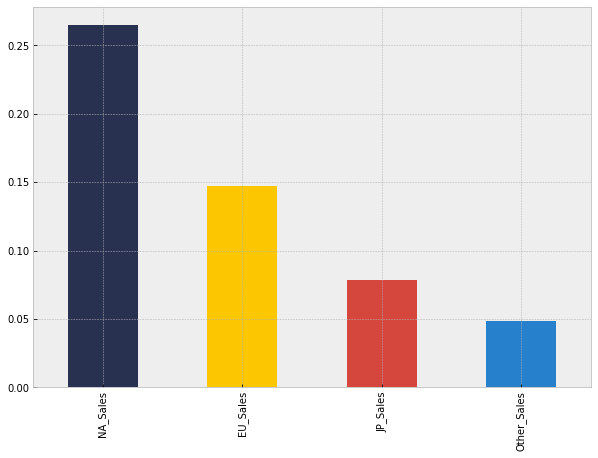

In [138]:
df.iloc[:, 5:9].mean().plot(kind='bar', color=['#283150','#fcc601' , '#d5473d', '#2680cc']);

In [ ]:
#지역별 판매평균 정규성 검정
stats.f_oneway(df.NA_Sales, df.EU_Sales, df.JP_Sales, df.Other_Sales)
#지역별 판매평균은 유의미하게 다르다

F_onewayResult(statistic=565.496803722431, pvalue=0.0)

In [ ]:
#NA의 판매량 평균은 EU의 판매량 평균보다 통계적으로 유의미하게 크다
stats.ttest_ind(df.NA_Sales, df.EU_Sales, alternative='greater')
# p < 0.05로, NA의 시장크기가 유의미하게 큼을 확인할 수 있음

Ttest_indResult(statistic=15.529431683779592, pvalue=1.7183016223286478e-54)

In [ ]:
#EU의 판매량 평균은 JP의 판매량 평균보다 통계적으로 유의미하게 크다
stats.ttest_ind(df.EU_Sales, df.JP_Sales, alternative='greater')
# p < 0.05로, EU의 시장크기가 유의미하게 큼을 확인할 수 있음

Ttest_indResult(statistic=14.798533637263459, pvalue=1.0846276473893439e-49)

In [144]:
#JP의 판매량 평균은 Other의 판매량 평균보다 통계적으로 유의미하게 크다
stats.ttest_ind(df.EU_Sales, df.JP_Sales, alternative='greater')
# p < 0.05로, JP의 시장크기가 유의미하게 큼을 확인할 수 있음

Ttest_indResult(statistic=14.79106834478806, pvalue=1.2113241367033742e-49)

In [ ]:
round(2.6530995687345257e-26, 2)

0.0

### **2-2. 총판매량과 지역별판매량을 장르별로 분석하였을때, 지역 특수장르가 존재하는지**

In [19]:
#장르별 판매평균량
genre = df.groupby('Genre').mean().sort_values('Sales_Sum',ascending=False )
genre
genre.drop('Year', axis=1, inplace=True)
genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Genre,,,,,
Platform,0.510172,0.229817,0.149519,0.058935,0.948442
Shooter,0.448813,0.242367,0.029828,0.079578,0.800586
Role-Playing,0.217584,0.124976,0.234082,0.038724,0.615365
Racing,0.290976,0.192797,0.046202,0.062765,0.592740
Sports,0.290239,0.161361,0.058617,0.057569,0.567786
Fighting,0.263892,0.119641,0.104359,0.043293,0.531186
Action,0.265046,0.158531,0.048333,0.056787,0.528698
Misc,0.234819,0.123825,0.061975,0.043212,0.463831
Simulation,0.214456,0.133558,0.075106,0.037021,0.460142


In [ ]:
# genre_new = genre.iloc[:, 0:4].T
# genre_new

In [20]:
genre.index

Index(['Platform', 'Shooter', 'Role-Playing', 'Racing', 'Sports', 'Fighting',
       'Action', 'Misc', 'Simulation', 'Puzzle', 'Strategy', 'Adventure'],
      dtype='object', name='Genre')

In [21]:
df_NA = df[df.NA_Sales > 0]

In [22]:
df_Action = df[df.Genre == 'Action']
df_Sports = df[df.Genre == 'Sports']
df_Shooter = df[df.Genre == 'Shooter']
df_Role_playing = df[df.Genre == 'Role-Playing']
df_Platform = df[df.Genre == 'Platform']
df_Misc = df[df.Genre == 'Misc']
df_Racing = df[df.Genre == 'Racing']
df_Fighting = df[df.Genre == 'Fighting']
df_Simulation = df[df.Genre == 'Simulation']
df_Puzzle = df[df.Genre == 'Puzzle']
df_Adventure = df[df.Genre == 'Adventure']
df_Strategy = df[df.Genre == 'Strategy']

#각지역의 장르별 판매량 ANOVA분석

stats.f_oneway(df_Action['NA_Sales'], df_Sports['NA_Sales'], df_Shooter['NA_Sales'], df_Role_playing['NA_Sales'], df_Platform['NA_Sales'], df_Misc['NA_Sales'], df_Racing['NA_Sales'], df_Fighting['NA_Sales'], df_Simulation['NA_Sales'], df_Puzzle['NA_Sales'], df_Adventure['NA_Sales'], df_Strategy['NA_Sales'])
# 3.400631311006001e-47)
stats.f_oneway(df_Action['EU_Sales'], df_Sports['EU_Sales'], df_Shooter['EU_Sales'], df_Role_playing['EU_Sales'], df_Platform['EU_Sales'], df_Misc['EU_Sales'], df_Racing['EU_Sales'], df_Fighting['EU_Sales'], df_Simulation['EU_Sales'], df_Puzzle['EU_Sales'], df_Adventure['EU_Sales'], df_Strategy['EU_Sales'])
#6.682041948305513e-29
stats.f_oneway(df_Action['JP_Sales'], df_Sports['JP_Sales'], df_Shooter['JP_Sales'], df_Role_playing['JP_Sales'], df_Platform['JP_Sales'], df_Misc['JP_Sales'], df_Racing['JP_Sales'], df_Fighting['JP_Sales'], df_Simulation['JP_Sales'], df_Puzzle['JP_Sales'], df_Adventure['JP_Sales'], df_Strategy['JP_Sales'])
#2.0347699927887078e-109
stats.f_oneway(df_Action['Other_Sales'], df_Sports['Other_Sales'], df_Shooter['Other_Sales'], df_Role_playing['Other_Sales'], df_Platform['Other_Sales'], df_Misc['Other_Sales'], df_Racing['Other_Sales'], df_Fighting['Other_Sales'], df_Simulation['Other_Sales'], df_Puzzle['Other_Sales'], df_Adventure['Other_Sales'], df_Strategy['Other_Sales'])
#3.2495140513395525e-24

F_onewayResult(statistic=12.64354824583363, pvalue=3.2495140513395525e-24)

In [23]:
round(6.682041948305513e-29, 20)

0.0

<Figure size 720x360 with 0 Axes>

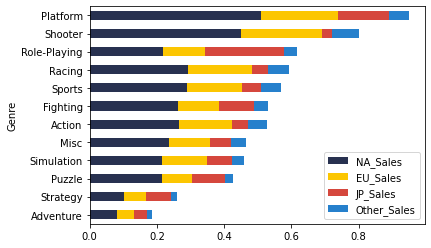

In [24]:
#장르별 판매량
plt.figure(figsize = (10, 5));
genre.iloc[:,0:4].plot(kind='barh', stacked=True, color=['#283150','#fcc601' , '#d5473d', '#2680cc']);
plt.gca().invert_yaxis();

In [128]:
genre.iloc[0,0:4], 2

(NA_Sales       0.510172
 EU_Sales       0.229817
 JP_Sales       0.149519
 Other_Sales    0.058935
 Name: Platform, dtype: float64, 2)

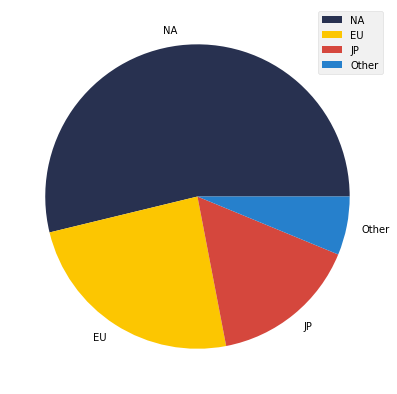

In [129]:
#플랫폼장르 지역별점유율
plt.pie(genre.iloc[0,0:4]*2, labels=['NA', 'EU', 'JP', 'Other'], colors=['#283150','#fcc601' , '#d5473d', '#2680cc']);
plt.legend();

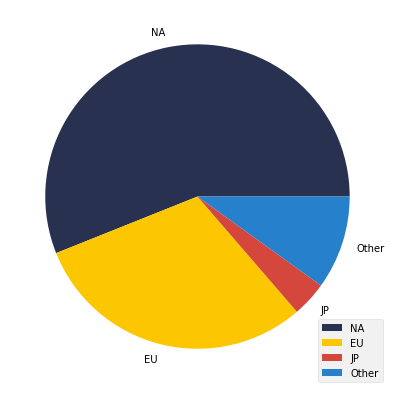

In [130]:
#슈터장르 지역별점유율
plt.pie(genre.iloc[1,0:4]*2, labels=['NA', 'EU', 'JP', 'Other'], colors=['#283150','#fcc601' , '#d5473d', '#2680cc']);
plt.legend();

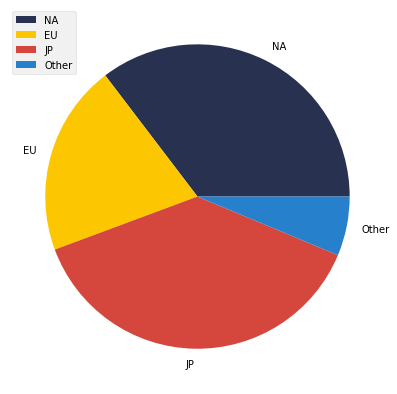

In [131]:
#롤플레잉장르 지역별점유율
plt.pie(genre.iloc[2,0:4]*2, labels=['NA', 'EU', 'JP', 'Other'], colors=['#283150','#fcc601' , '#d5473d', '#2680cc']);
plt.legend();

In [113]:
genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Genre,,,,,
Platform,0.510172,0.229817,0.149519,0.058935,0.948442
Shooter,0.448813,0.242367,0.029828,0.079578,0.800586
Role-Playing,0.217584,0.124976,0.234082,0.038724,0.615365
Racing,0.290976,0.192797,0.046202,0.062765,0.592740
Sports,0.290239,0.161361,0.058617,0.057569,0.567786


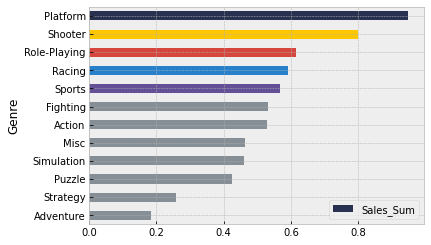

In [ ]:
#전지역 장르별 총판매평균순위
genre.plot(y='Sales_Sum', kind='barh', color=['#283150','#fcc601' , '#d5473d', '#2680cc', '#635096', '#868e96', '#868e96', '#868e96', '#868e96', '#868e96', '#868e96', '#868e96']);
plt.gca().invert_yaxis();

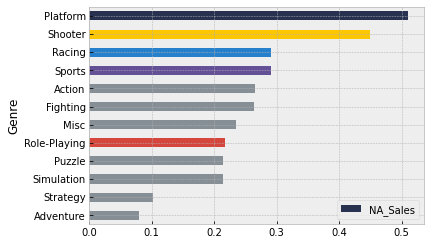

In [ ]:
#각 지역별 장르판매순위
genre.sort_values('NA_Sales', ascending=False).plot(y='NA_Sales', kind='barh', color=['#283150','#fcc601' , '#2680cc', '#635096', '#868e96', '#868e96', '#868e96', '#d5473d', '#868e96', '#868e96', '#868e96', '#868e96']);
plt.gca().invert_yaxis();

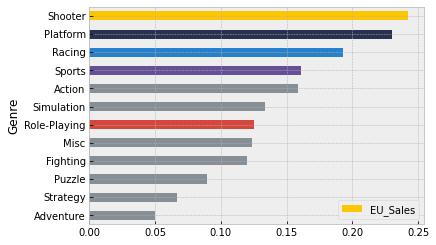

In [ ]:
genre.sort_values('EU_Sales', ascending=False).plot(y='EU_Sales', kind='barh', color=['#fcc601', '#283150' , '#2680cc', '#635096', '#868e96', '#868e96', '#d5473d', '#868e96', '#868e96', '#868e96', '#868e96', '#868e96']);
plt.gca().invert_yaxis();

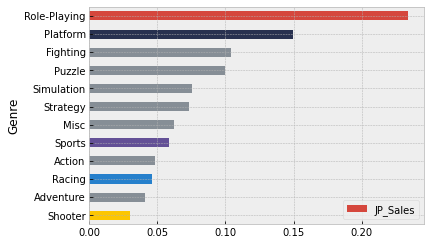

In [ ]:
genre.sort_values('JP_Sales', ascending=False).plot(y='JP_Sales', kind='barh', color=['#d5473d','#283150', '#868e96', '#868e96',  '#868e96', '#868e96', '#868e96','#635096', '#868e96', '#2680cc', '#868e96', '#fcc601' ]);
plt.gca().invert_yaxis();

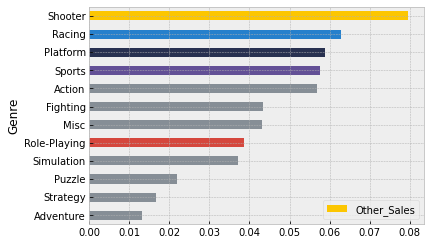

In [ ]:
genre.sort_values('Other_Sales', ascending=False).plot(y='Other_Sales', kind='barh', color=['#fcc601' , '#2680cc', '#283150', '#635096', '#868e96', '#868e96', '#868e96', '#d5473d','#868e96', '#868e96', '#868e96', '#868e96']);
plt.gca().invert_yaxis();

In [ ]:
genre_prop = genre.copy()
def prop(group):
  for i in range(genre.shape[0]):
    group.iloc[:,i] = group.NA_Sales / group.NA_Sales.sum()
    group.iloc[:,i+1] = group.EU_Sales / group.EU_Sales.sum()
    group.iloc[:,i+2] = group.JP_Sales / group.JP_Sales.sum()
    group.iloc[:,i+3] = group.Other_Sales / group.Other_Sales.sum()
    group.iloc[:,i+4] = group.Sales_Sum / group.Sales_Sum.sum()
    return group

prop(genre_prop)
genre_prop

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Genre,,,,,
Platform,0.162866,0.135726,0.146345,0.111236,0.148724
Shooter,0.143278,0.143138,0.029195,0.150199,0.125538
Role-Playing,0.069461,0.073809,0.229113,0.073088,0.096494
Racing,0.092890,0.113863,0.045221,0.118464,0.092946
Sports,0.092655,0.095297,0.057373,0.108657,0.089034
Fighting,0.084244,0.070658,0.102144,0.081714,0.083294
Action,0.084613,0.093626,0.047307,0.107182,0.082904
Misc,0.074963,0.073129,0.060660,0.081561,0.072733
Simulation,0.068462,0.078877,0.073512,0.069875,0.072154


<Figure size 936x360 with 0 Axes>

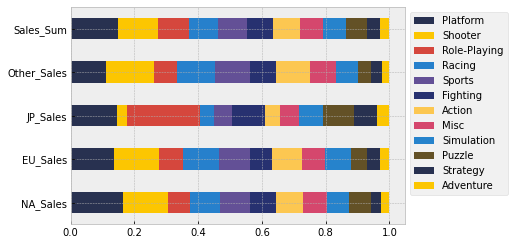

In [ ]:
#지역별 선호장르 그래프
plt.figure(figsize = (13, 5));
genre_prop.T.plot(kind='barh', stacked=True, color=['#283150','#fcc601' , '#d5473d', '#2680cc', '#635096', '#273170','#fcc751' , '#d5476d', '#2683cc', '#635126']);
plt.legend(bbox_to_anchor=(1,1));

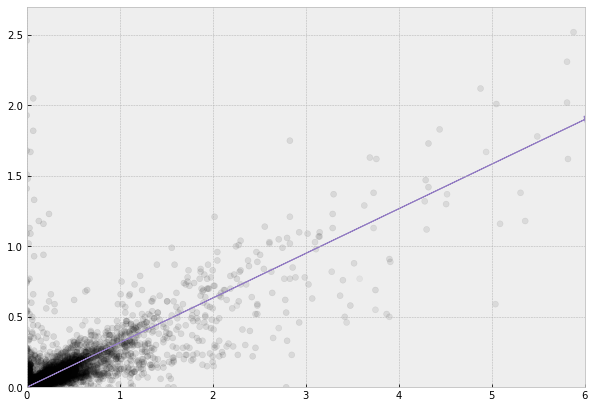

In [143]:
#유럽과 기타지역 판매량의 상관관계 시각화
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(df['EU_Sales'], df['Other_Sales'], alpha=0.1, c=df['Sales_Sum'], cmap='gray');
plt.xlim(0,6);
plt.ylim(0,2.7);
plt.arrow(0, 0, 6, 1.9, lw=1, head_width = .05, head_length = .05, color ='#947EC3');

## **3. 가설2) 연도별 게임의 트렌드가 있을까**

### **3-1. 연도별 장르, 시장규모 분석**

In [25]:
#연도 데이터 범위 조정 / 데이터개수가 적은 오래된 값과 분기예측 시점(2017년 상반기)에 맞는 데이터
df = df[(df.Year > 1980) & (df.Year < 2017)]

In [36]:
#연도별 데이터개수 / 시점을 2017년 상반기로 설정
df_year = df.groupby(['Year']).count()
df_year_mean = df.groupby(['Year']).mean()
df_year_new = pd.concat([df_year, df_year_mean], axis=1)
df_year_new

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Year,,,,,,,,,,,,,,
1981,46,46,46,46,46,46,46,46,46,0.726087,0.042609,0.000000,0.006957,0.775652
1982,36,36,36,36,36,36,36,36,36,0.747778,0.045833,0.000000,0.008611,0.802222
1983,17,17,17,17,17,17,17,17,17,0.456471,0.047059,0.476471,0.008235,0.988235
1984,14,14,14,14,14,14,14,14,14,2.377143,0.150000,1.019286,0.050000,3.596429
1985,14,14,14,14,14,14,14,14,14,2.409286,0.338571,1.040000,0.065714,3.853571
1986,21,21,21,21,21,21,21,21,21,0.595238,0.135238,0.943333,0.091905,1.765714
1987,16,16,16,16,16,16,16,16,16,0.528750,0.088125,0.726875,0.012500,1.356250
1988,15,15,15,15,15,15,15,15,15,1.591333,0.439333,1.050667,0.066000,3.147333
1989,17,17,17,17,17,17,17,17,17,2.655882,0.496471,1.080000,0.088235,4.320588


In [29]:
df_year_only = df.groupby(['Year']).mean()
df_year_only

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Year,,,,,
1981,0.726087,0.042609,0.000000,0.006957,0.775652
1982,0.747778,0.045833,0.000000,0.008611,0.802222
1983,0.456471,0.047059,0.476471,0.008235,0.988235
1984,2.377143,0.150000,1.019286,0.050000,3.596429
1985,2.409286,0.338571,1.040000,0.065714,3.853571
1986,0.595238,0.135238,0.943333,0.091905,1.765714
1987,0.528750,0.088125,0.726875,0.012500,1.356250
1988,1.591333,0.439333,1.050667,0.066000,3.147333
1989,2.655882,0.496471,1.080000,0.088235,4.320588


In [51]:
#연도 분류 함수
def class_year(df, colnum):
  df['Year5'] = ''
  for i in range(0, df.shape[0]):
    if (df.iloc[i, colnum] >= 1981) & (df.iloc[i, colnum] <= 1985):
      df.iloc[i, -1] = '1981-1985'
    elif (df.iloc[i, colnum] >= 1986) & (df.iloc[i, colnum] <= 1990):
      df.iloc[i, -1] = '1986-1990'
    elif (df.iloc[i, colnum] >= 1991) & (df.iloc[i, colnum] <= 1995):
      df.iloc[i, -1] = '1991-1995'
    elif (df.iloc[i, colnum] >= 1996) & (df.iloc[i, colnum] <= 2000):
      df.iloc[i, -1] = '1996-2000'
    elif (df.iloc[i, colnum] >= 2001) & (df.iloc[i, colnum] <= 2005):
      df.iloc[i, -1] = '2001-2005'
    elif (df.iloc[i, colnum] >= 2006) & (df.iloc[i, colnum] <= 2010):
      df.iloc[i, -1] = '2006-2010'
    else:
      df.iloc[i, -1] = '2011-2016'

In [30]:
year5_col = np.append(np.repeat('1981-1985',5), np.repeat('1986-1990',5))
year5_col = np.append(year5_col, np.repeat('1991-1996',5))
year5_col = np.append(year5_col, np.repeat('1996-2000',5))
year5_col = np.append(year5_col, np.repeat('2001-2005',5))
year5_col = np.append(year5_col, np.repeat('2006-2010',5))
year5_col = np.append(year5_col, np.repeat('2011-2016',6))
year5_col

array(['1981-1985', '1981-1985', '1981-1985', '1981-1985', '1981-1985',
       '1986-1990', '1986-1990', '1986-1990', '1986-1990', '1986-1990',
       '1991-1996', '1991-1996', '1991-1996', '1991-1996', '1991-1996',
       '1996-2000', '1996-2000', '1996-2000', '1996-2000', '1996-2000',
       '2001-2005', '2001-2005', '2001-2005', '2001-2005', '2001-2005',
       '2006-2010', '2006-2010', '2006-2010', '2006-2010', '2006-2010',
       '2011-2016', '2011-2016', '2011-2016', '2011-2016', '2011-2016',
       '2011-2016'], dtype='<U9')

In [31]:
df_year_only['Year5'] = year5_col
df_year5 = df_year_only.groupby('Year5').mean()
df_year5 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Year5,,,,,
1981-1985,1.343353,0.124814,0.507151,0.027903,2.003222
1986-1990,1.392491,0.327208,0.946175,0.069228,2.735102
1991-1996,0.339374,0.127436,0.388959,0.020298,0.876067
1996-2000,0.328350,0.172038,0.159384,0.030584,0.690357
2001-2005,0.284012,0.146994,0.057843,0.044090,0.532938
2006-2010,0.248903,0.132736,0.050445,0.054842,0.486926
2011-2016,0.197362,0.167630,0.061340,0.052904,0.479236


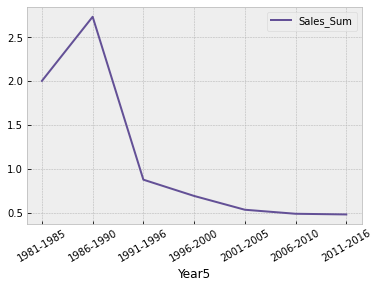

In [37]:
#연도별 총판매량평균 추이
df_year5.plot(y='Sales_Sum', color = ['#635096']);
plt.xticks(rotation=30);

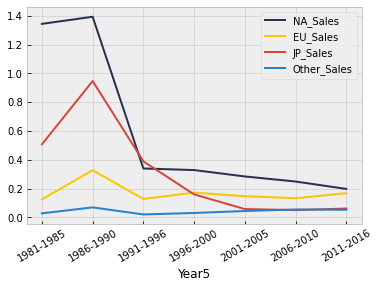

In [38]:
#연도/지역별 판매량 추이
df_year5.plot(y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], color=['#283150','#fcc601' , '#d5473d', '#2680cc']);
plt.xticks(rotation=30);

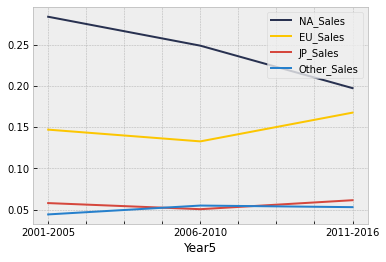

In [39]:
#최근 연도 지역별 판매량 추이 
df_year5.iloc[4:,:].plot(y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], color=['#283150','#fcc601' , '#d5473d', '#2680cc']);

In [40]:
#연도와 장르별 판매량평균
df_year_genre = df.groupby(['Year', 'Genre']).mean().reset_index()
df_year_genre['Year5'] = ""

for i in range(0, df_year_genre.shape[0]):
  if (df_year_genre.iloc[i, 0] >= 1981) & (df_year_genre.iloc[i, 0] <= 1985):
    df_year_genre.iloc[i, -1] = '1981-1985'
  elif (df_year_genre.iloc[i, 0] >= 1986) & (df_year_genre.iloc[i, 0] <= 1990):
    df_year_genre.iloc[i, -1] = '1986-1990'
  elif (df_year_genre.iloc[i, 0] >= 1991) & (df_year_genre.iloc[i, 0] <= 1995):
    df_year_genre.iloc[i, -1] = '1991-1995'
  elif (df_year_genre.iloc[i, 0] >= 1996) & (df_year_genre.iloc[i, 0] <= 2000):
    df_year_genre.iloc[i, -1] = '1996-2000'
  elif (df_year_genre.iloc[i, 0] >= 2001) & (df_year_genre.iloc[i, 0] <= 2005):
    df_year_genre.iloc[i, -1] = '2001-2005'
  elif (df_year_genre.iloc[i, 0] >= 2006) & (df_year_genre.iloc[i, 0] <= 2010):
    df_year_genre.iloc[i, -1] = '2006-2010'
  else:
    df_year_genre.iloc[i, -1] = '2011-2016'

df_year_genre

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
0,1981,Action,0.554400,0.032400,0.000000,0.004800,0.591600,1981-1985
1,1981,Platform,2.156667,0.123333,0.000000,0.026667,2.306667,1981-1985
2,1981,Puzzle,1.045000,0.065000,0.000000,0.015000,1.125000,1981-1985
3,1981,Racing,0.450000,0.030000,0.000000,0.000000,0.480000,1981-1985
4,1981,Shooter,0.937000,0.056000,0.000000,0.009000,1.002000,1981-1985
5,1981,Simulation,0.420000,0.020000,0.000000,0.000000,0.440000,1981-1985
6,1981,Sports,0.185000,0.010000,0.000000,0.000000,0.195000,1981-1985
7,1982,Action,0.337222,0.021111,0.000000,0.002778,0.361111,1981-1985
8,1982,Misc,0.810000,0.050000,0.000000,0.010000,0.870000,1981-1985
9,1982,Platform,0.938000,0.056000,0.000000,0.012000,1.006000,1981-1985


<Figure size 1440x720 with 0 Axes>

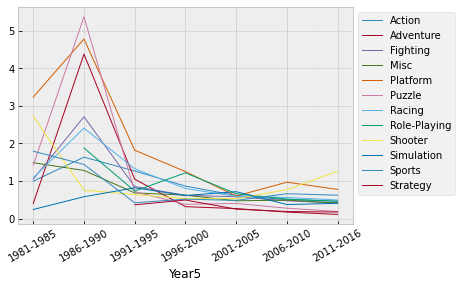

In [41]:
#연도별 장르 판매평균량 현황
df_genre2 = df_year_genre.pivot_table(index='Year5', columns='Genre', values='Sales_Sum', aggfunc='mean')
df_genre2.apply(pd.to_numeric, errors='coerce').fillna(0)
df_genre2.sort_index()
df_genre2

plt.figure(figsize=(20,10));
df_genre2.plot(kind='line', lw=1);
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=30);


# dict_labels_handles = dict(zip(labels, handles))
# labels = ['Platform', 'Shooter', 'Role-Playing', 'Racing', 'Sports', 'Fighting', 'Action', 'Misc', 'Simulation', 'Puzzle', 'Strategy', 'Adventure']
# handles = [dict_labels_handles[l] for l in labels]
# ax.legend(handles, labels, **config_legend)

<Figure size 1440x1440 with 0 Axes>

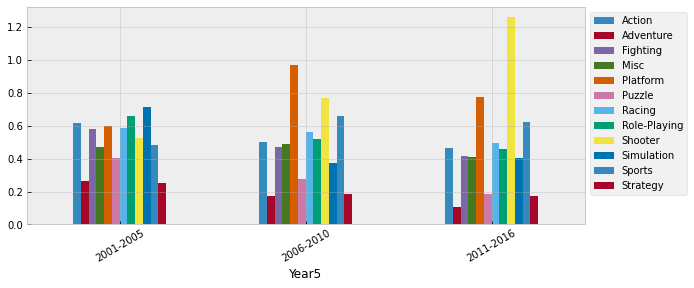

In [45]:
#최근 15년간 장르별 판매평균량 현황
plt.rcParams["figure.figsize"] = (10,4)
plt.figure(figsize=(20,20));
df_genre2.iloc[4:,:].plot(kind='bar', lw=1.2);
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=30);

<Figure size 1440x1440 with 0 Axes>

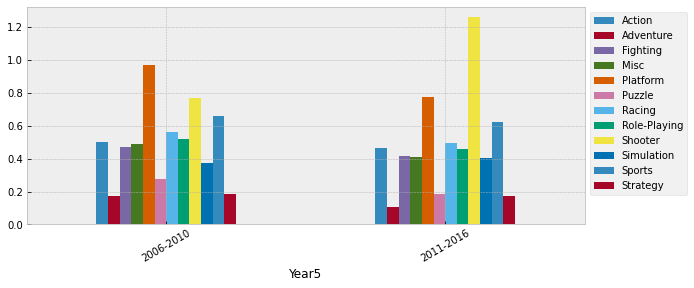

In [44]:
#최근 10년간 장르별 판매평균량 현황
plt.figure(figsize=(20,20));
df_genre2.iloc[5:,:].plot(kind='bar', lw=1);
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=30);

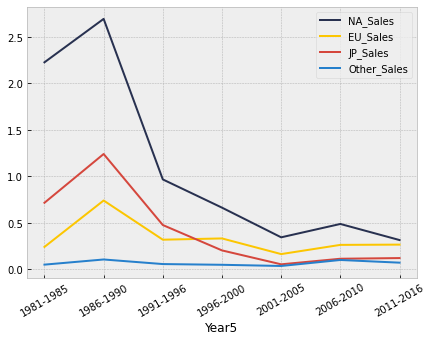

In [148]:
#연도별 플랫폼장르의 판매평균량 / 가시성 위해 5년도로 묶어서 표현
plt.rcParams["figure.figsize"] = (7,5)

df_year_pl_mean = df[df.Genre == 'Platform'].groupby(['Year']).mean()
df_year_pl_mean['Year5'] = year5_col
df_year_pl_mean = df_year_pl_mean.groupby('Year5').mean()
df_year_pl_mean

df_year_pl_mean.plot(y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], color=['#283150','#fcc601' , '#d5473d', '#2680cc']);
plt.xticks(rotation=30);

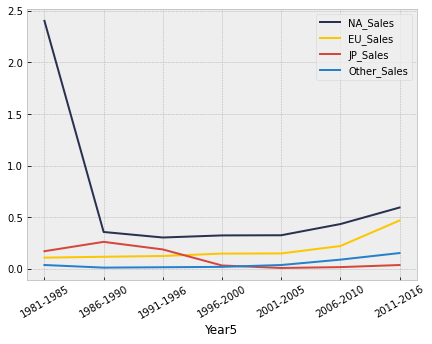

In [149]:
#연도별 슈터장르의 판매평균량 / 가시성 위해 5년도로 묶어서 표현

year5_col_sh = np.delete(year5_col,7)

df_year_sh_mean = df[df.Genre == 'Shooter'].groupby(['Year']).mean()
df_year_sh_mean['Year5'] = year5_col_sh
df_year_sh_mean = df_year_sh_mean.groupby('Year5').mean()
df_year_sh_mean

df_year_sh_mean.plot(y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],color=['#283150','#fcc601' , '#d5473d', '#2680cc'] );
plt.xticks(rotation=30);

In [145]:
df_year_rp_mean = df[df.Genre == 'Role-Playing'].groupby(['Year']).mean()

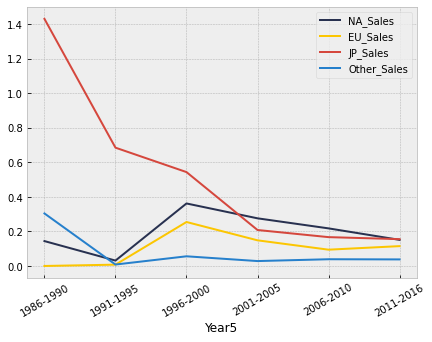

In [150]:
#연도별 롤플레잉 장르의 판매평균량 / 가시성 위해 5년도로 묶어서 표현

year5_col_sh = np.delete(year5_col,7)

df_year_rp_mean = df[df.Genre == 'Role-Playing'].groupby(['Year']).mean().reset_index()
class_year(df_year_rp_mean, 0)
df_year_rp_mean = df_year_rp_mean.groupby('Year5').mean()
df_year_rp_mean

df_year_rp_mean.plot(y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],color=['#283150','#fcc601' , '#d5473d', '#2680cc'] );
plt.xticks(rotation=30);

In [53]:
#플랫폼장르의 판매량은 슈터장르의 판매량보다 통계적으로 유의미하게 크다
stats.ttest_ind(df[df.Genre == 'Platform'].Sales_Sum, df[df.Genre == 'Shooter'].Sales_Sum, alternative='greater') #0.055944742348375445
#p>0.05로, 플랫폼장르의 판매량이 슈터장르의 판매량보다 통계적으로 유의미하게 크다고 말하기 어려움

Ttest_indResult(statistic=1.5904100863665454, pvalue=0.055944742348375445)

In [54]:
round(9.075857135851938e-05, 2)

0.0

<Figure size 1440x360 with 0 Axes>

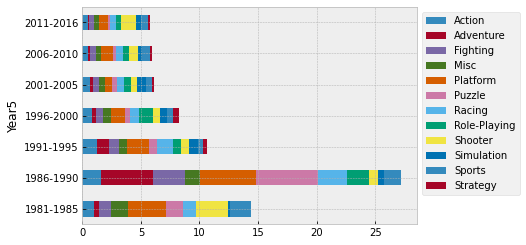

In [ ]:
plt.figure(figsize = (20, 5));
df_genre2.plot(kind='barh', stacked=True);
plt.legend(bbox_to_anchor=(1,1));

## **3-2. 연도별 플랫폼 분석**

In [ ]:
#연도별 선호플랫폼
df_year_platform = df.groupby(['Year', 'Platform']).count().reset_index()
df_year_platform['Year5'] = ""

for i in range(0, df_year_platform.shape[0]):
  if (df_year_platform.iloc[i, 0] >= 1981) & (df_year_platform.iloc[i, 0] <= 1985):
    df_year_platform.iloc[i, -1] = '1981-1985'
  elif (df_year_platform.iloc[i, 0] >= 1986) & (df_year_platform.iloc[i, 0] <= 1990):
    df_year_platform.iloc[i, -1] = '1986-1990'
  elif (df_year_platform.iloc[i, 0] >= 1991) & (df_year_platform.iloc[i, 0] <= 1995):
    df_year_platform.iloc[i, -1] = '1991-1995'
  elif (df_year_platform.iloc[i, 0] >= 1996) & (df_year_platform.iloc[i, 0] <= 2000):
    df_year_platform.iloc[i, -1] = '1996-2000'
  elif (df_year_platform.iloc[i, 0] >= 2001) & (df_year_platform.iloc[i, 0] <= 2005):
    df_year_platform.iloc[i, -1] = '2001-2005'
  elif (df_year_platform.iloc[i, 0] >= 2006) & (df_year_platform.iloc[i, 0] <= 2010):
    df_year_platform.iloc[i, -1] = '2006-2010'
  else:
    df_year_platform.iloc[i, -1] = '2011-2016'

df_platform2 = df_year_platform.pivot_table(index='Year5', columns='Platform', values='Sales_Sum', aggfunc='count')
df_platform2.apply(pd.to_numeric, errors='coerce').fillna(0)
df_platform2.sort_index()
df_platform2

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-1985,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-1990,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-1995,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1.0,NaN,4.0,3.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-2000,NaN,NaN,NaN,3.0,NaN,5.0,1.0,NaN,NaN,NaN,5.0,NaN,1.0,5.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN
2001-2005,NaN,NaN,NaN,2.0,2.0,1.0,5.0,5.0,NaN,NaN,2.0,NaN,NaN,5.0,NaN,3.0,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,5.0,NaN
2006-2010,NaN,NaN,NaN,2.0,5.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,3.0,NaN
2011-2016,NaN,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,6.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,6.0,NaN,4.0


In [ ]:
df_platform2.T.index.get_level_values(0) #get cities

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

<Figure size 1440x720 with 0 Axes>

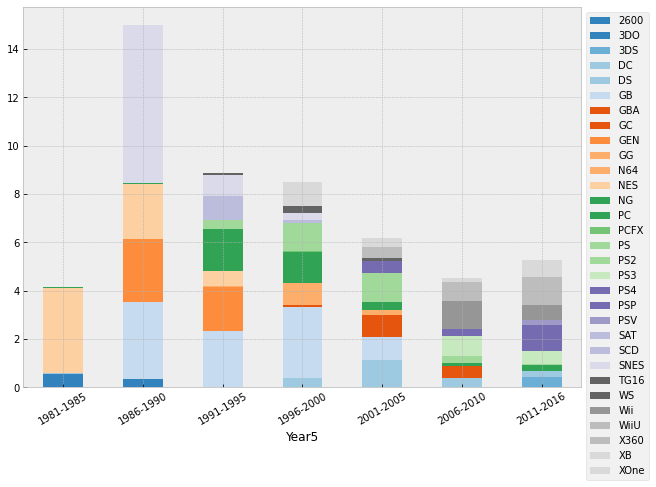

In [ ]:
#연도별 플랫폼 추이
df_year_platform = df.groupby(['Year', 'Platform']).mean().reset_index()
class_year(df_year_platform, 0)
df_platform2 = df_year_platform.pivot_table(index='Year5', columns='Platform', values='Sales_Sum', aggfunc='mean')
df_platform2.apply(pd.to_numeric, errors='coerce').fillna(0)
df_platform2.sort_index()
df_platform2

plt.figure(figsize=(20,10));
pl_plot = df_platform2.plot(kind='bar', stacked=True, lw=2, cmap='tab20c');
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=30);

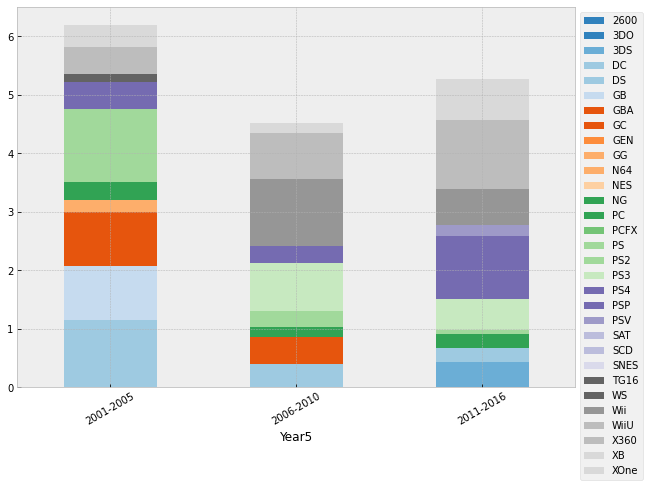

In [ ]:
#최근연도 플랫폼 추이
df_platform2.iloc[4:, :].plot(kind='bar', stacked=True, lw=2, cmap='tab20c');
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=30);

In [ ]:
df_platform2.iloc[6:, :]

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-2016,NaN,NaN,0.433935,NaN,0.230646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25159,NaN,NaN,0.064286,0.533322,1.015594,0.065004,0.184018,NaN,NaN,NaN,NaN,NaN,0.611116,0.542993,0.641442,NaN,0.701877


In [ ]:
df_platform2.iloc[6:, :].columns

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

In [ ]:
df_platform_pie = df_platform2.iloc[6:, :]
df_platform_pie  = df_platform_pie.dropna(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


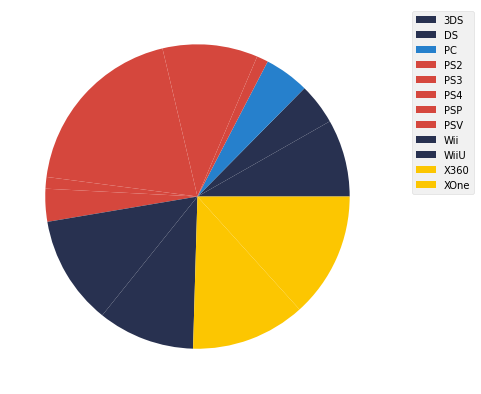

In [ ]:
#2011년 이후 플랫폼별 점유율
plt.pie(df_platform_pie , colors = ['#283150','#283150' , '#2680cc','#d5473d', '#d5473d', '#d5473d','#d5473d','#d5473d', '#283150', '#283150','#fcc601', '#fcc601']);
plt.legend(df_platform_pie ,bbox_to_anchor=(1.05, 1) );

### **4. 가설3) 출고량 높은 게임 / K Means 메소드**
- 목표로 하면 좋은 게임 목록

### **4-1.KMeans / 전체**

In [ ]:
#전체데이터 클러스터화

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
col_genre = df.Genre
col_genre.head()

0       Action
1       Action
2    Adventure
3         Misc
4     Platform
Name: Genre, dtype: object

In [ ]:
df_region = df.iloc[:, 5:8]
df_region.head()

,NA_Sales,EU_Sales,JP_Sales
0,0.04,0.00,0.00
1,0.17,0.00,0.00
2,0.00,0.00,0.02
3,0.04,0.00,0.00
4,0.12,0.09,0.00


In [ ]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_region)
  sse[k] = kmeans.inertia_

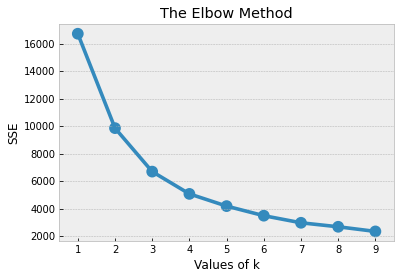

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_region)
cluster_labels = kmeans.labels_
df_region_k = df_region.assign(Cluster = cluster_labels)

In [ ]:
cluster_0 = df_region_k[df_region_k.Cluster == 0]
cluster_1 = df_region_k[df_region_k.Cluster == 1]
cluster_2 = df_region_k[df_region_k.Cluster == 2]

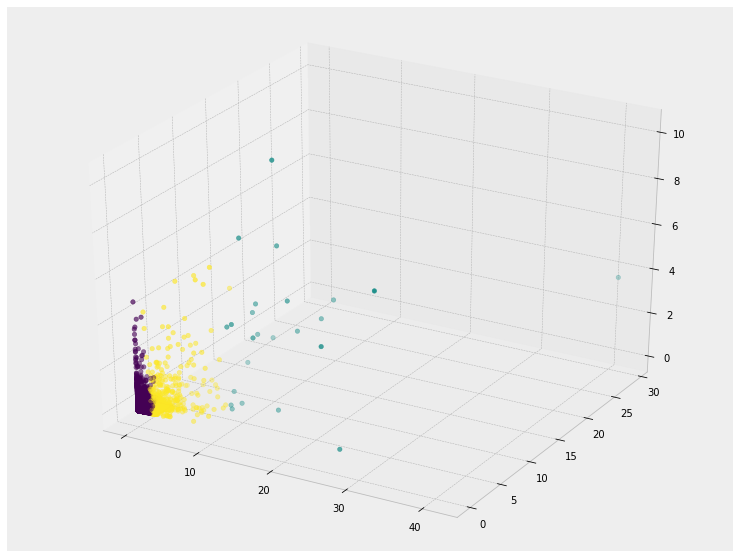

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = df_region_k.NA_Sales, ys = df_region_k.EU_Sales, zs = df_region_k.JP_Sales, c=df_region_k.Cluster)

plt.show()

In [ ]:
cluster_avg = df_region_k.groupby(['Cluster']).mean()
cluster_avg

,NA_Sales,EU_Sales,JP_Sales
Cluster,,,
0,0.163543,0.088004,0.059147
1,14.222917,7.418750,3.309583
2,2.338667,1.402617,0.448200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


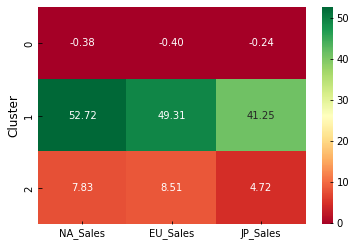

In [ ]:
population_avg = df.mean()
population_avg[1:4]
relative_imp = cluster_avg / population_avg[1:4] - 1
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap = "RdYlGn");

In [ ]:
#클러스터1의 인덱스
cluster1_index = df_region_k[df_region_k.Cluster == 1].index
cluster1_index[0]

1187

In [ ]:
#클러스터1에 속하는 게임 추출
df_cl1 = pd.DataFrame(columns = np.array(df.columns))
for i in range(0, len(cluster1_index)):
  df_cl1 = df_cl1.append(df.iloc[cluster1_index[i], :])
df_cl1 

In [ ]:
#클러스터1 연도분류
class_year(df_cl1, 2)
df_cl1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
1187,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1986-1990
2757,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,2011-2016
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006-2010
2959,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2006-2010
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2006-2010
3367,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,2006-2010
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,2011-2016
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1981-1985
4253,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,2006-2010
5227,Cars,Wii,2006,Racing,THQ,0.83,0.04,0.00,0.07,0.94,2006-2010


In [ ]:
#클러스터1 연도추이
df_cl1.groupby('Year5').count()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Year5,,,,,,,,,,
1981-1985,2,2,2,2,2,2,2,2,2,2
1986-1990,1,1,1,1,1,1,1,1,1,1
1996-2000,1,1,1,1,1,1,1,1,1,1
2001-2005,3,3,3,3,3,3,3,3,3,3
2006-2010,12,12,12,12,12,12,12,12,12,12
2011-2016,5,5,5,5,5,5,5,5,5,5


In [ ]:
#클러스터1 장르 순위
df_cl1.groupby('Genre').count()

,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
Genre,,,,,,,,,,
Action,3,3,3,3,3,3,3,3,3,3
Adventure,1,1,1,1,1,1,1,1,1,1
Misc,5,5,5,5,5,5,5,5,5,5
Platform,1,1,1,1,1,1,1,1,1,1
Puzzle,1,1,1,1,1,1,1,1,1,1
Racing,3,3,3,3,3,3,3,3,3,3
Shooter,2,2,2,2,2,2,2,2,2,2
Sports,6,6,6,6,6,6,6,6,6,6
Strategy,2,2,2,2,2,2,2,2,2,2


In [ ]:
#클러스터1 플랫폼 순위
df_cl1.groupby('Platform').count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
Platform,,,,,,,,,,
3DS,2,2,2,2,2,2,2,2,2,2
DS,1,1,1,1,1,1,1,1,1,1
GB,1,1,1,1,1,1,1,1,1,1
GBA,1,1,1,1,1,1,1,1,1,1
NES,2,2,2,2,2,2,2,2,2,2
PS,1,1,1,1,1,1,1,1,1,1
PS2,3,3,3,3,3,3,3,3,3,3
PS3,1,1,1,1,1,1,1,1,1,1
Wii,7,7,7,7,7,7,7,7,7,7


In [ ]:
#전체년도 장르별 판매량
df_cl1.groupby('Genre').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Genre,,,,,
Action,2.420000,3.090000,0.350000,1.380000,7.240000
Adventure,0.120000,0.040000,0.000000,0.010000,0.170000
Misc,5.922000,2.888000,1.098000,0.922000,10.830000
Platform,29.080000,3.580000,6.810000,0.770000,40.240000
Puzzle,23.200000,2.260000,4.220000,0.580000,30.260000
Racing,0.336667,0.040000,0.000000,0.026667,0.403333
Shooter,4.585000,2.195000,0.065000,0.680000,7.525000
Sports,11.331667,8.271667,1.778333,2.326667,23.708333
Strategy,0.015000,0.010000,0.005000,0.000000,0.030000


In [ ]:
#2000년 이후 클러스터1 판매량평균
df_cl1[df_cl1.Year >=2000].groupby('Genre').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Genre,,,,,
Action,2.420000,3.090000,0.350000,1.380000,7.240000
Adventure,0.120000,0.040000,0.000000,0.010000,0.170000
Misc,7.400000,3.610000,0.840000,1.152500,13.002500
Racing,0.336667,0.040000,0.000000,0.026667,0.403333
Shooter,4.585000,2.195000,0.065000,0.680000,7.525000
Sports,11.331667,8.271667,1.778333,2.326667,23.708333
Strategy,0.000000,0.000000,0.010000,0.000000,0.010000


<Figure size 1440x1440 with 0 Axes>

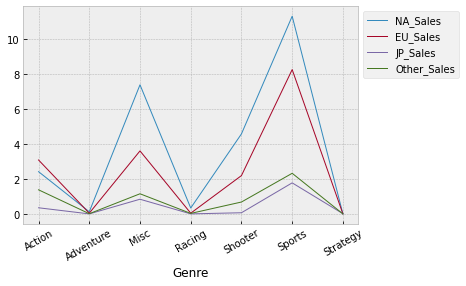

In [ ]:
plt.figure(figsize=(20,20));
df_cl1[df_cl1.Year >=2000].groupby('Genre').mean().iloc[:,:4].plot(kind='line', lw=1);
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=30);

### **4-2. Kmeans / 최근 16개년**
- 목표로 하면 좋은 게임 목록

In [55]:
df_region_new_all = df[df.Year >= 2000]
df_region_new_all.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

col_genre = df.Genre
col_genre.head()


df_region_new = df[df.Year >= 2000].iloc[:, 5:9]
df_region_new.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04


In [ ]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_region_new)
  sse[k] = kmeans.inertia_

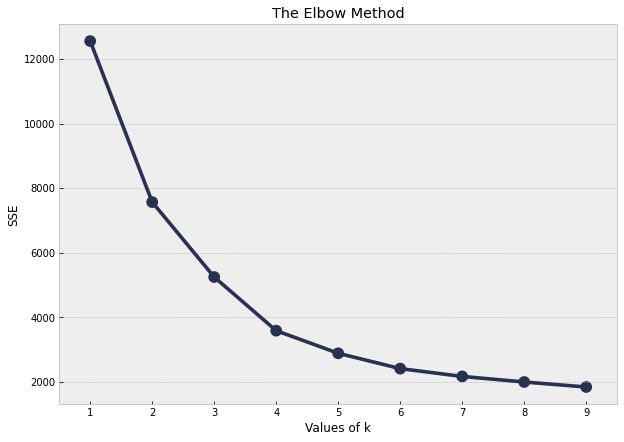

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()), color = '#283150')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_region_new)
cluster_labels = kmeans.labels_
df_region_new_k = df_region_new.assign(Cluster = cluster_labels)

In [58]:
cluster_0 = df_region_new_k[df_region_new_k.Cluster == 0]
cluster_1 = df_region_new_k[df_region_new_k.Cluster == 1]
cluster_2 = df_region_new_k[df_region_new_k.Cluster == 2]
cluster_3 = df_region_new_k[df_region_new_k.Cluster == 3]

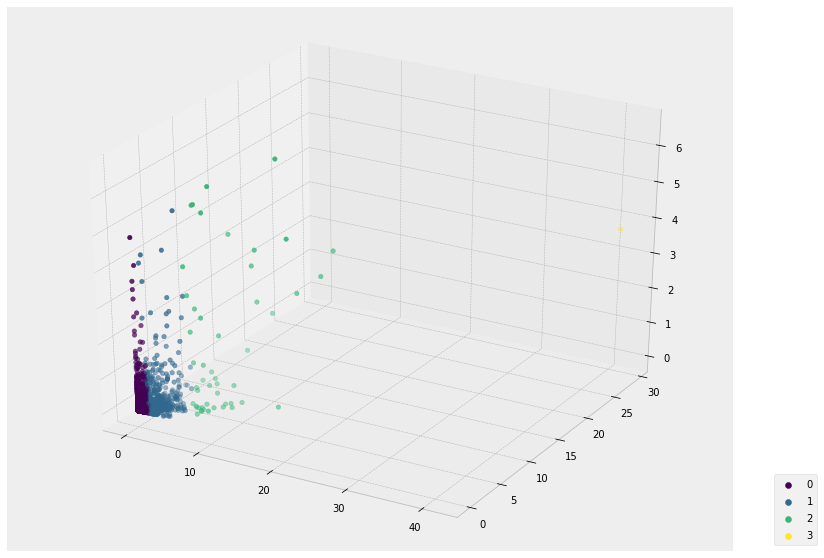

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(xs = df_region_new_k.NA_Sales, ys = df_region_new_k.EU_Sales, zs = df_region_new_k.JP_Sales,  c=df_region_new_k.Cluster);
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 0.15), loc=2);

plt.show()

In [ ]:
df_region_new_k.groupby(['Cluster']).mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Cluster,,,,
0,0.141386,0.077673,0.040326,0.028391
1,1.638908,1.057185,0.229244,0.354426
2,7.518600,4.955000,1.709800,1.681800
3,41.490000,29.020000,3.770000,8.460000


In [60]:
df.iloc[df_region_new_k[df_region_new_k.Cluster == 3].index, :]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
df_region_new_k.groupby(['Cluster']).mean().iloc[0:3, :]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Cluster,,,,
0,0.141386,0.077673,0.040326,0.028391
1,1.638908,1.057185,0.229244,0.354426
2,7.518600,4.955000,1.709800,1.681800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


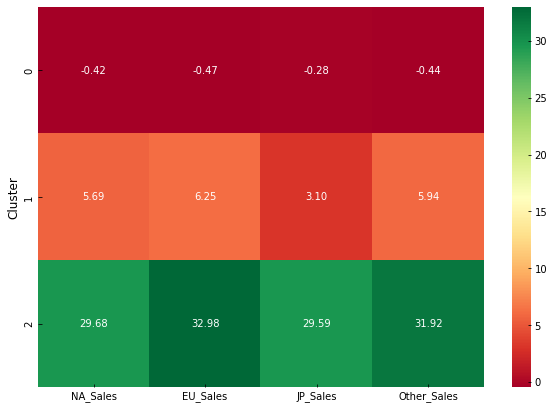

In [ ]:
cluster_new_avg = df_region_new_k.groupby(['Cluster']).mean().iloc[0:3, :]

population_new_avg = df[df.Year >= 2000].mean()
population_new_avg[1:5]
relative_imp = cluster_new_avg / population_new_avg[1:5] - 1
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap = "RdYlGn");

In [ ]:
df_region_new_k[df_region_new_k.Cluster == 2]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
119,5.91,2.38,0.13,0.90,2
220,6.05,3.15,0.00,1.07,2
503,3.44,5.36,5.32,1.18,2
992,6.85,5.09,1.87,1.16,2
1973,3.80,5.81,0.36,2.02,2
2757,9.03,4.28,0.13,1.32,2
2959,14.03,9.20,2.93,2.85,2
3288,15.75,11.01,3.28,2.96,2
3367,8.94,8.03,3.60,2.15,2
3414,7.01,9.27,0.97,4.14,2


In [ ]:
df_region_new_all.shape,  df_region_new_k.shape

((14269, 10), (14269, 5))

In [61]:
#클러스터2의 인덱스
cluster2_new_index = df_region_new_k[df_region_new_k.Cluster == 2].index
cluster2_new_index

Int64Index([  119,   220,   503,   992,  1973,  2757,  2959,  3288,  3367,
             3414,  4152,  4163,  4253,  4704,  5226,  5489,  6107,  6119,
             6160,  6257,  6796,  8208,  8892,  9049,  9311,  9597,  9733,
             9802, 10345, 10410, 10438, 10681, 10695, 10698, 10901, 10914,
            11283, 12146, 12211, 12316, 12337, 12359, 12950, 13626, 13814,
            14265, 14355, 14586, 16120, 16176],
           dtype='int64')

### **4-3. 최근 15개년 우수사례(클러스터2)**

In [62]:
#클러스터2에 속하는 게임 추출
df_cl2_new = pd.DataFrame(columns = np.array(df.columns))
for i in range(0, len(cluster2_new_index)):
  df_cl2_new = df_cl2_new.append(df_region_new_all.loc[cluster2_new_index[i], :])

class_year(df_cl2_new, 2)
df_cl2_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
119,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90,9.32,2006-2010
220,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27,2011-2016
503,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30,2001-2005
992,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.97,2001-2005
1973,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,2011-2016
2757,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,2011-2016
2959,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2006-2010
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2006-2010
3367,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,2006-2010
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,2011-2016


In [67]:
df_cl2_new.groupby('Genre').count()

,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
Genre,,,,,,,,,,
Action,9,9,9,9,9,9,9,9,9,9
Fighting,1,1,1,1,1,1,1,1,1,1
Misc,6,6,6,6,6,6,6,6,6,6
Platform,5,5,5,5,5,5,5,5,5,5
Puzzle,1,1,1,1,1,1,1,1,1,1
Racing,4,4,4,4,4,4,4,4,4,4
Role-Playing,5,5,5,5,5,5,5,5,5,5
Shooter,15,15,15,15,15,15,15,15,15,15
Simulation,1,1,1,1,1,1,1,1,1,1


In [66]:
df_cl2_new.groupby('Platform').count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
Platform,,,,,,,,,,
3DS,3,3,3,3,3,3,3,3,3,3
DS,9,9,9,9,9,9,9,9,9,9
GBA,1,1,1,1,1,1,1,1,1,1
PS2,4,4,4,4,4,4,4,4,4,4
PS3,6,6,6,6,6,6,6,6,6,6
PS4,2,2,2,2,2,2,2,2,2,2
Wii,10,10,10,10,10,10,10,10,10,10
X360,14,14,14,14,14,14,14,14,14,14
XB,1,1,1,1,1,1,1,1,1,1


In [68]:
pl_gen_scat = pd.DataFrame(df_cl2_new.groupby(['Platform', 'Genre']).count().iloc[:, 1]).reset_index()
pl_gen_scat = pd.pivot_table( pl_gen_scat, index='Platform', columns='Genre', values='Year')
pl_gen_scat 

Genre,Action,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
Platform,,,,,,,,,,
3DS,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
DS,1.0,NaN,1.0,2.0,1.0,1.0,2.0,NaN,1.0,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
PS2,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
PS3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
PS4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Wii,NaN,1.0,3.0,2.0,NaN,1.0,NaN,NaN,NaN,3.0
X360,2.0,NaN,2.0,NaN,NaN,NaN,1.0,9.0,NaN,NaN
XB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [69]:
pl_gen_scat

Genre,Action,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
Platform,,,,,,,,,,
3DS,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
DS,1.0,NaN,1.0,2.0,1.0,1.0,2.0,NaN,1.0,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
PS2,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
PS3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
PS4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Wii,NaN,1.0,3.0,2.0,NaN,1.0,NaN,NaN,NaN,3.0
X360,2.0,NaN,2.0,NaN,NaN,NaN,1.0,9.0,NaN,NaN
XB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [71]:
df_cl2_new.groupby(['Platform','Genre']).count()

Name  Year  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Platform Genre                                                               
3DS      Platform         1     1          1         1         1         1   
         Racing           1     1          1         1         1         1   
         Role-Playing     1     1          1         1         1         1   
DS       Action           1     1          1         1         1         1   
         Misc             1     1          1         1         1         1   
         Platform         2     2          2         2         2         2   
         Puzzle           1     1          1         1         1         1   
         Racing           1     1          1         1         1         1   
         Role-Playing     2     2          2         2         2         2   
         Simulation       1     1          1         1         1         1   
GBA      Role-Playing     1     1          1         1         1         1   
PS2      Action           3     3          3         3         3         3   
         Racing           1     1          1         1         1         1   
PS3      Action           2     2          2         2         2         2   
         Shooter          4     4          4         4         4         4   
PS4      Action           1     1          1         1         1         1   
         Shooter          1     1          1         1         1         1   
Wii      Fighting         1     1          1         1         1         1   
         Misc             3     3          3         3         3         3   
         Platform         2     2          2         2         2         2   
         Racing           1     1          1         1         1         1   
         Sports           3     3          3         3         3         3   
X360     Action           2     2          2         2         2         2   
         Misc             2     2          2         2         2         2   
         Role-Playing     1     1          1         1         1         1   
         Shooter          9     9          9         9         9         9   
XB       Shooter          1     1          1         1         1         1   

                       Other_Sales  Sales_Sum  Year5  
Platform Genre                                        
3DS      Platform                1          1      1  
         Racing                  1          1      1  
         Role-Playing            1          1      1  
DS       Action                  1          1      1  
         Misc                    1          1      1  
         Platform                2          2      2  
         Puzzle                  1          1      1  
         Racing                  1          1      1  
         Role-Playing            2          2      2  
         Simulation              1          1      1  
GBA      Role-Playing            1          1      1  
PS2      Action                  3          3      3  
         Racing                  1          1      1  
PS3      Action                  2          2      2  
         Shooter                 4          4      4  
PS4      Action                  1          1      1  
         Shooter                 1          1      1  
Wii      Fighting                1          1      1  
         Misc                    3          3      3  
         Platform                2          2      2  
         Racing                  1          1      1  
         Sports                  3          3      3  
X360     Action                  2          2      2  
         Misc                    2          2      2  
         Role-Playing            1          1      1  
         Shooter                 9          9      9  
XB       Shooter                 1          1      1

In [72]:
df_pl_gen = df_cl2_new.groupby(['Platform','Genre']).count().iloc[:, 1].reset_index()
df_pl_gen 

,Platform,Genre,Year
0,3DS,Platform,1
1,3DS,Racing,1
2,3DS,Role-Playing,1
3,DS,Action,1
4,DS,Misc,1
5,DS,Platform,2
6,DS,Puzzle,1
7,DS,Racing,1
8,DS,Role-Playing,2
9,DS,Simulation,1


In [73]:
df_pl_mean = df_cl2_new.groupby(['Platform','Genre']).mean().iloc[:, -1].reset_index()
df_pl_mean

,Platform,Genre,Sales_Sum
0,3DS,Platform,10.790000
1,3DS,Racing,12.210000
2,3DS,Role-Playing,11.330000
3,DS,Action,11.900000
4,DS,Misc,20.220000
5,DS,Platform,20.215000
6,DS,Puzzle,15.300000
7,DS,Racing,23.430000
8,DS,Role-Playing,16.835000
9,DS,Simulation,24.750000


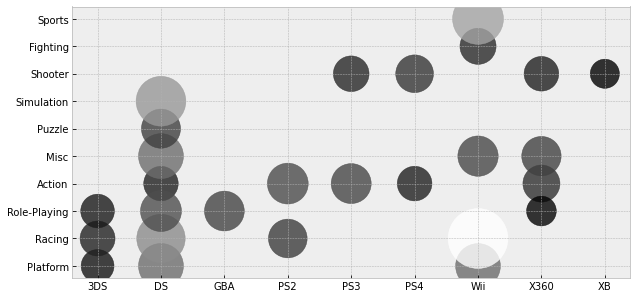

In [83]:
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(df_pl_mean['Platform'], df_pl_mean['Genre'], s = df_pl_mean['Sales_Sum']*100, alpha=0.8, c=df_pl_mean['Sales_Sum'], cmap='gray');

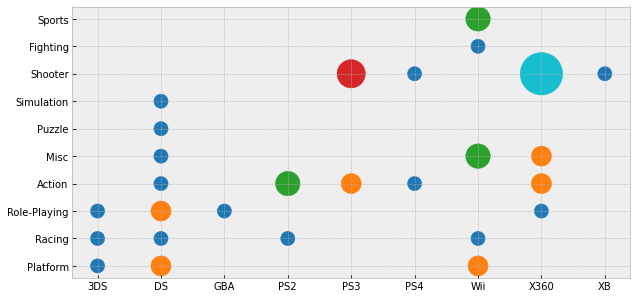

In [84]:
plt.scatter(df_pl_gen['Platform'], df_pl_gen['Genre'], s = df_pl_gen['Year']*200, c=df_pl_gen['Year'], cmap='tab10');

In [ ]:
df_pl_gen

,Platform,Genre,Year
0,3DS,Platform,1
1,3DS,Racing,1
2,3DS,Role-Playing,1
3,DS,Action,1
4,DS,Misc,1
5,DS,Platform,2
6,DS,Puzzle,1
7,DS,Racing,1
8,DS,Role-Playing,2
9,DS,Simulation,1


In [ ]:
df_gen = df_gen_sales.melt(id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']) 
df_gen

,Genre,variable,value
0,Action,NA_Sales,6.798889
1,Fighting,NA_Sales,6.750000
2,Misc,NA_Sales,8.536667
3,Platform,NA_Sales,8.420000
4,Puzzle,NA_Sales,3.440000
5,Racing,NA_Sales,9.312500
6,Role-Playing,NA_Sales,5.462000
7,Shooter,NA_Sales,6.921333
8,Simulation,NA_Sales,9.070000
9,Sports,NA_Sales,11.260000


In [ ]:
df_gen_sales = df_cl2_new.groupby('Genre').mean().reset_index()
df_gen_NA = df_gen_sales.melt(id_vars='Genre', value_vars='NA_Sales') 
df_gen_EU = df_gen_sales.melt(id_vars='Genre', value_vars='EU_Sales') 
df_gen_JP= df_gen_sales.melt(id_vars='Genre', value_vars='JP_Sales')
df_gen_Ot= df_gen_sales.melt(id_vars='Genre', value_vars='Other_Sales') 
df_gen_Ot

,Genre,variable,value
0,Action,Other_Sales,2.734444
1,Fighting,Other_Sales,1.020000
2,Misc,Other_Sales,1.531667
3,Platform,Other_Sales,1.536000
4,Puzzle,Other_Sales,1.180000
5,Racing,Other_Sales,1.820000
6,Role-Playing,Other_Sales,0.838000
7,Shooter,Other_Sales,1.286000
8,Simulation,Other_Sales,2.750000
9,Sports,Other_Sales,2.300000


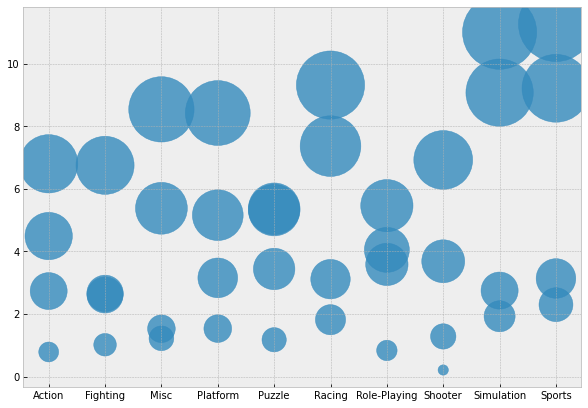

In [ ]:
plt.scatter(df_gen['Genre'], df_gen['value'], alpha=0.8,s=df_gen['value']*500);

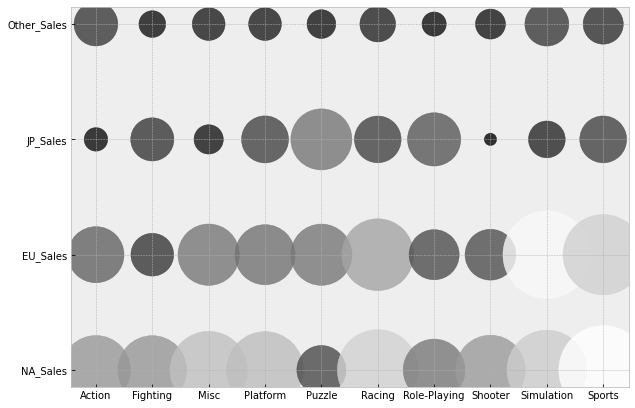

In [ ]:
plt.scatter(df_gen['Genre'], df_gen['variable'], alpha=0.8,s=df_gen['value']*700, c=df_gen['value'], cmap='gray');

In [ ]:
df_cl2_new.groupby('Genre').mean().sort_values('NA_Sales')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Genre,,,,,
Puzzle,3.440000,5.360000,5.320000,1.180000,15.300000
Role-Playing,5.462000,3.586000,4.050000,0.838000,13.936000
Fighting,6.750000,2.610000,2.660000,1.020000,13.040000
Action,6.798889,4.491111,0.790000,2.734444,14.814444
Shooter,6.921333,3.686000,0.214000,1.286000,12.107333
Platform,8.420000,5.158000,3.156000,1.536000,18.270000
Misc,8.536667,5.378333,1.226667,1.531667,16.673333
Simulation,9.070000,11.000000,1.930000,2.750000,24.750000
Racing,9.312500,7.362500,3.115000,1.820000,21.610000


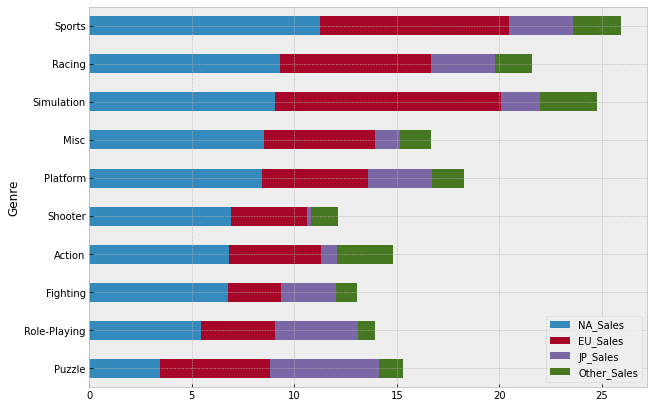

In [ ]:
df_cl2_new.groupby('Genre').mean().sort_values('NA_Sales').iloc[:, 0:4].plot(kind='barh', stacked=True);

In [ ]:
df_cl2_mean = df_cl2_new.groupby('Genre').mean().T
df_cl2_mean

Genre,Action,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
NA_Sales,6.798889,6.75,8.536667,8.420,3.44,9.3125,5.462,6.921333,9.07,11.260000
EU_Sales,4.491111,2.61,5.378333,5.158,5.36,7.3625,3.586,3.686000,11.00,9.210000
JP_Sales,0.790000,2.66,1.226667,3.156,5.32,3.1150,4.050,0.214000,1.93,3.136667
Other_Sales,2.734444,1.02,1.531667,1.536,1.18,1.8200,0.838,1.286000,2.75,2.300000
Sales_Sum,14.814444,13.04,16.673333,18.270,15.30,21.6100,13.936,12.107333,24.75,25.906667


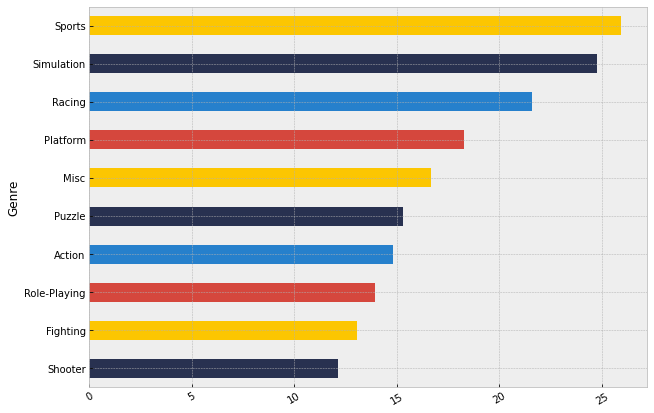

In [ ]:
df_cl2_new.groupby('Genre').mean().sort_values('Sales_Sum')['Sales_Sum'].plot( kind='barh', color=['#283150','#fcc601' , '#d5473d', '#2680cc']);
plt.xticks(rotation=30);

In [ ]:
df_cl2_mean.iloc[0:4].mean() #3.026833

Genre
Action          3.703611
Fighting        3.260000
Misc            4.168333
Platform        4.567500
Puzzle          3.825000
Racing          5.402500
Role-Playing    3.484000
Shooter         3.026833
Simulation      6.187500
Sports          6.476667
dtype: float64

In [ ]:
stats.f_oneway(df_cl2_mean.Sports, df_cl2_mean.Simulation, df_cl2_mean.Racing, df_cl2_mean.Platform)
#상위 장르4개별 판매량의 차이가 유의미하게 다르진 않다

F_onewayResult(statistic=0.13416866552906187, pvalue=0.9382502275289816)

In [ ]:
df_cl2_new.groupby('Genre').count()

,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
Genre,,,,,,,,,,
Action,9,9,9,9,9,9,9,9,9,9
Fighting,1,1,1,1,1,1,1,1,1,1
Misc,6,6,6,6,6,6,6,6,6,6
Platform,5,5,5,5,5,5,5,5,5,5
Puzzle,1,1,1,1,1,1,1,1,1,1
Racing,4,4,4,4,4,4,4,4,4,4
Role-Playing,5,5,5,5,5,5,5,5,5,5
Shooter,15,15,15,15,15,15,15,15,15,15
Simulation,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_cl2_new.groupby('Year5').count()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
Year5,,,,,,,,,,
2001-2005,11,11,11,11,11,11,11,11,11,11
2006-2010,23,23,23,23,23,23,23,23,23,23
2011-2016,16,16,16,16,16,16,16,16,16,16


In [ ]:
df_cl2_new.head()
df_cl2_pca = df_cl2_new.iloc[:, 5:9]

In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
Z = scaler.fit_transform(df_cl2_pca)

# 표준화한 데이터에 대하여 pca 시행 
pca = PCA() 
pca.fit(Z)

B = pca.transform(Z)

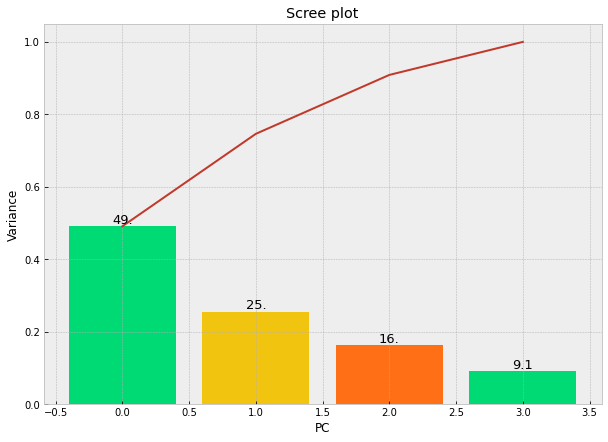

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [ ]:
col_cl2_genre = df_cl2_new.Genre.reset_index(drop=True)
col_cl2_genre

0          Shooter
1             Misc
2           Puzzle
3           Racing
4           Action
5          Shooter
6             Misc
7           Sports
8           Sports
9           Action
10         Shooter
11    Role-Playing
12            Misc
13          Action
14          Action
15         Shooter
16         Shooter
17         Shooter
18         Shooter
19         Shooter
20        Platform
21         Shooter
22         Shooter
23            Misc
24         Shooter
25          Action
26         Shooter
27            Misc
28    Role-Playing
29    Role-Playing
30          Racing
31          Sports
32          Action
33    Role-Playing
34          Racing
35      Simulation
36    Role-Playing
37        Platform
38        Platform
39          Racing
40         Shooter
41        Platform
42            Misc
43          Action
44         Shooter
45         Shooter
46          Action
47        Fighting
48          Action
49        Platform
Name: Genre, dtype: object

In [85]:
df_cl2_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Year5
119,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90,9.32,2006-2010
220,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27,2011-2016
503,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30,2001-2005
992,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.97,2001-2005
1973,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,2011-2016


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


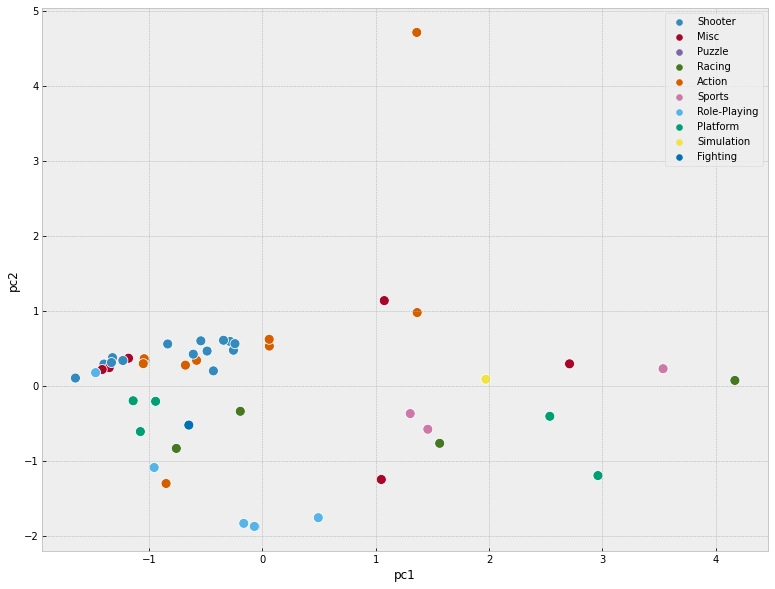

In [ ]:
pca = PCA(2) 
pca.fit(Z)

B = pca.transform(Z)
final = pd.DataFrame(B, columns=['pc1', 'pc2'])
final['Genre'] = col_cl2_genre

fig = plt.figure(figsize = (13,10))
sns.scatterplot(final.pc1, final.pc2, hue=final.Genre, s=100);
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


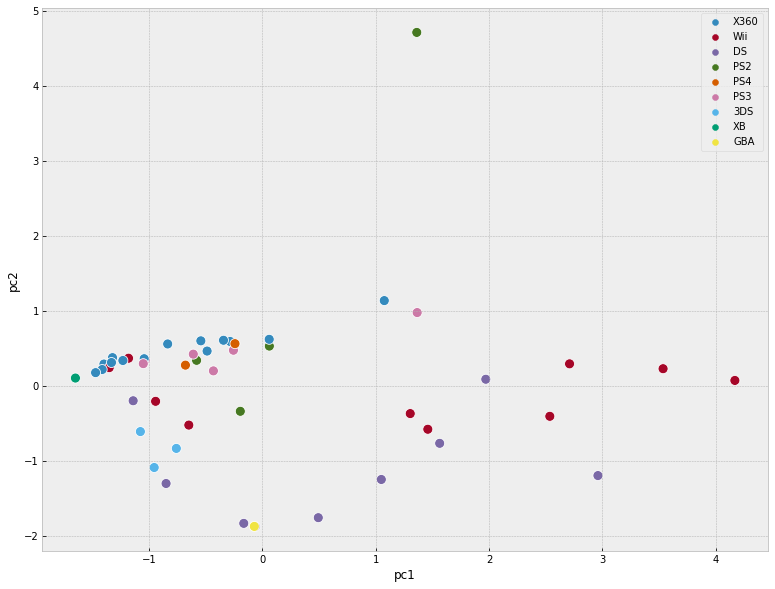

In [ ]:
col_cl2_platform = df_cl2_new.Platform.reset_index(drop=True)
final['Platform'] = col_cl2_platform


fig = plt.figure(figsize = (13,10))
sns.scatterplot(final.pc1, final.pc2, hue=final.Platform, s=100);
plt.legend()

In [ ]:
B.shape

(50, 2)

In [ ]:
pca = PCA(4) 
pca.fit(Z)

B = pca.transform(Z)
final = pd.DataFrame(B, columns=['pc1', 'pc2', 'pc3', 'pc4'])
final['Genre'] = col_cl2_genre

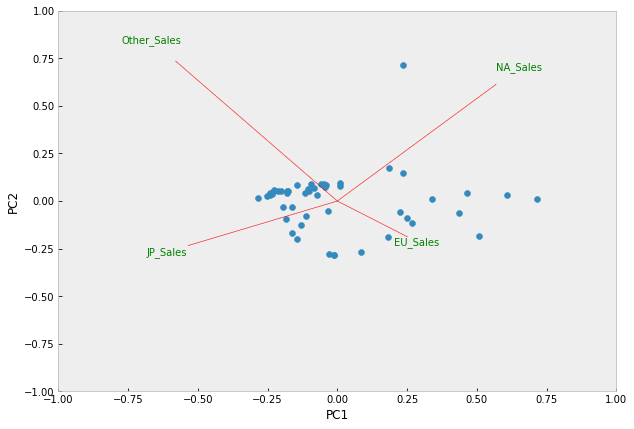

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
      plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
      if labels is None:
          plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
      else:
          plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
biplot(B, pca.components_, 1, 2, labels=df_cl2_pca.columns)